# <b>KGFarm</b><br>
##### <b>A Feature Discovery system for Machine learning workflow</b>

In [1]:
from feature_discovery.src.api.api import KGFarm
kgfarm = KGFarm()

connected to http://localhost:9999/blazegraph/namespace/glac/sparql


#### <b>Using KGlac for discovery operations</b>

In [2]:
import os
import sys
import pandas as pd
sys.path.append('../data_discovery/knowledge_graph/src/')
from api.api import *
from storage.kglac_client import KGLacClient
from storage.elasticsearch_client import ElasticsearchClient
kglac = API(ElasticsearchClient(), KGLacClient('glac')) 

In [3]:
kglac.get_all_tables()

,db_name,column_name
0,Retail Banking-demo-data,completedacct.parquet
1,Retail Banking-demo-data,completedcard.parquet
2,Retail Banking-demo-data,completedclient.parquet
3,Retail Banking-demo-data,completeddisposition.parquet
4,Retail Banking-demo-data,completeddistrict.parquet
5,Retail Banking-demo-data,completedloan.parquet
6,Retail Banking-demo-data,completedorder.parquet
7,Retail Banking-demo-data,crm_reviews.parquet
8,Retail Banking-demo-data,luxuryloanportfolio.parquet


In [4]:
df = kglac.search_tables_on([['district']])
df

,table_name,dataset_name,origin,number_of_columns,number_of_rows,path
0,completedclient.parquet,Retail Banking-demo-data,mock,21.0,5369.0,/Users/shubhamvashisth/Documents/CoDS/projects...
1,completedacct.parquet,Retail Banking-demo-data,mock,9.0,4500.0,/Users/shubhamvashisth/Documents/CoDS/projects...
2,crm_reviews.parquet,Retail Banking-demo-data,mock,6.0,505.0,/Users/shubhamvashisth/Documents/CoDS/projects...
3,completeddistrict.parquet,Retail Banking-demo-data,mock,7.0,77.0,/Users/shubhamvashisth/Documents/CoDS/projects...


#### <b>Predicting Feast's Entites and Feature Views using KGFarm</b>

In [5]:
# 1. To see the predicted feature views in df format use show_feature_view param = True
# 2. To change feature repo use path_to_feature_repo param

kgfarm.predict_entities_and_feature_views(ttl=1000, show_feature_views=True)

Predicted entities and feature view(s) File saved at:  /Users/shubhamvashisth/Documents/CoDS/projects/KGFarm/feature_repo/predicted_register.py

Showing predicted Feature views:


,Feature_view,Entity,Entity_data_type,FileSource,Joinable_table,FileSource_path
0,feature_view_1,district_id,INT64,crm_reviews.parquet,completeddistrict.parquet,/Users/shubhamvashisth/Documents/CoDS/projects...
1,feature_view_2,account_id,STRING,completeddisposition.parquet,completedacct.parquet,/Users/shubhamvashisth/Documents/CoDS/projects...
2,feature_view_3,account_id,STRING,completedorder.parquet,completedacct.parquet,/Users/shubhamvashisth/Documents/CoDS/projects...


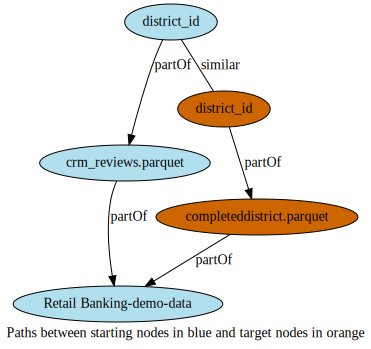

In [6]:
kglac.get_path_between_tables(df.iloc[2], df.iloc[3], hops=1)

In [7]:
df1 = pd.read_parquet(df.iloc[3].path)
df1

,district_id,city,state_name,state_abbrev,region,division,timestamp
0,1,New York City,New York,NY,Northeast,Middle Atlantic,2022-04-02 21:46:04.955818
1,2,Jacksonville,Florida,FL,South,South Atlantic,2022-04-02 21:46:04.955818
2,3,Columbus,Ohio,OH,Midwest,East North Central,2022-04-02 21:46:04.955818
3,4,Charlotte,North Carolina,NC,South,South Atlantic,2022-04-02 21:46:04.955818
4,5,Indianapolis,Indiana,IN,Northeast,East North Central,2022-04-02 21:46:04.955818
...,...,...,...,...,...,...,...
72,73,New Britain,Connecticut,CT,Northeast,New England,2022-04-02 21:46:04.955818
73,74,Chicago,Illinois,IL,Northeast,East North Central,2022-04-02 21:46:04.955818
74,75,Rochester,New York,NY,Northeast,Middle Atlantic,2022-04-02 21:46:04.955818
75,76,Yonkers,New York,NY,Northeast,Middle Atlantic,2022-04-02 21:46:04.955818


In [8]:
from feast import FeatureStore

In [9]:
store = FeatureStore('feature_repo/')
store.get_historical_features(
    entity_df = df1,
    features = kgfarm.predict_features(df.iloc[3])
).to_df()

Using timestamp as the event timestamp. To specify a column explicitly, please name it event_timestamp.


,district_id,city,state_name,state_abbrev,region,division,timestamp,product,date,reviews,stars
338,54,Houston,Texas,TX,South,West South Central,2022-04-02 21:46:04.955818+00:00,Eagle National Bank,2017-05-24,Working with Jon was such an amazing experienc...,5
333,53,Hartford,Connecticut,CT,Northeast,New England,2022-04-02 21:46:04.955818+00:00,Eagle National Bank,2016-07-18,Adam was great to work with during our refi! H...,5
329,52,New Haven,Connecticut,CT,Northeast,New England,2022-04-02 21:46:04.955818+00:00,Eagle National Bank,2017-10-02,Started refinance with Nick things were going ...,1
323,51,Springfield,Massachusetts,MA,Northeast,New England,2022-04-02 21:46:04.955818+00:00,Eagle National Mortgage,2016-05-20,None,5
362,59,Quincy,Massachusetts,MA,Northeast,New England,2022-04-02 21:46:04.955818+00:00,Eagle Capital,2017-04-10,\nVery receptive\nThorough\nQuick to close\n ...,5
...,...,...,...,...,...,...,...,...,...,...,...
165,27,San Antonio,Texas,TX,South,West South Central,2022-04-02 21:46:04.955818+00:00,Eagle National Bank,2017-12-24,Our loan officer was happy to communicate befo...,1
161,26,Honolulu,Hawaii,HI,West,Pacific,2022-04-02 21:46:04.955818+00:00,Eagle Capital,2013-02-04,None,1
159,25,Wichita,Kansas,KS,Midwest,West North Central,2022-04-02 21:46:04.955818+00:00,Eagle National Mortgage,2014-10-10,None,5
172,28,Anchorage,Alaska,AK,West,Pacific,2022-04-02 21:46:04.955818+00:00,Eagle Capital,2016-01-23,None,5


In [10]:
os.chdir('feature_repo/')
!feast materialize-incremental 2022-04-21

Materializing 3 feature views to 2022-04-20 20:00:00-04:00 into the sqlite online store.

predicted_feature_view_2 from 2003-02-20 04:57:34-05:00 to 2022-04-20 20:00:00-04:00:
100%|█████████████████████████████████████████████████████████| 4500/4500 [00:00<00:00, 8434.90it/s]
predicted_feature_view_1 from 2003-02-20 04:57:35-05:00 to 2022-04-20 20:00:00-04:00:
100%|█████████████████████████████████████████████████████████████| 77/77 [00:00<00:00, 6374.07it/s]
predicted_feature_view_3 from 2003-02-20 04:57:35-05:00 to 2022-04-20 20:00:00-04:00:
100%|█████████████████████████████████████████████████████████| 3758/3758 [00:00<00:00, 5974.19it/s]
